In [11]:
import pandas as pd
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import statsmodels.api as sm
import xarray as xr
from matplotlib.colors import TwoSlopeNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [27]:
out_half = {}
out_dbl = {}
out_normal = {}

for out in ['evapotranspiration', 'runoff', 'snow', 'soil_moisture']:
    out_half[out] = xr.open_dataset(f"results/half_precip_output/{out}.nc")
    out_normal[out] = xr.open_dataset(f"results/fast_model/{out}.nc")
    out_dbl[out] = xr.open_dataset(f"results/dbl_precip_output/{out}.nc")

C:\Users\Nutzer\AppData\Local\Temp\ipykernel_19752\736314990.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


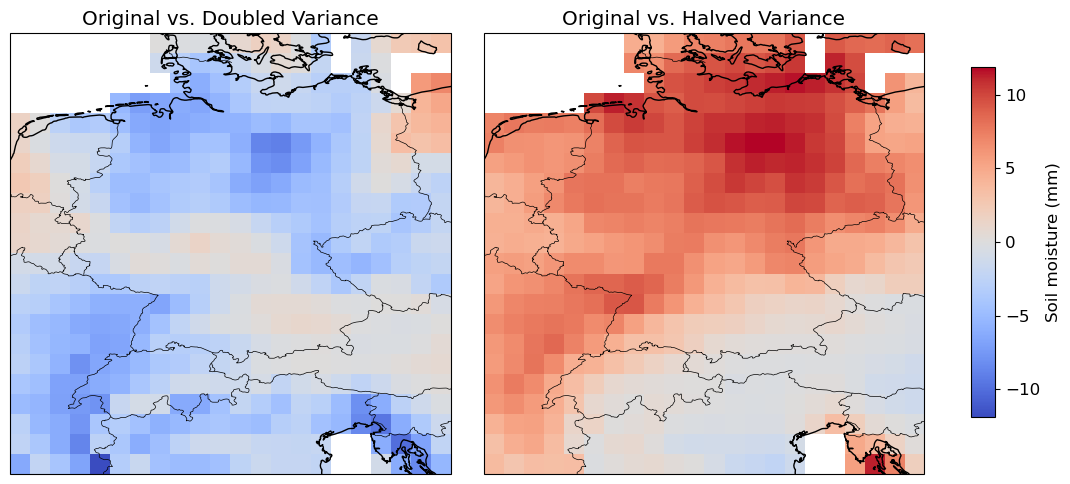

In [22]:
# Show the difference in percent
year = 2018
out_param = 'soil_moisture'

# Define the datasets
datasets = [out_normal[out_param], out_dbl[out_param], out_half[out_param]]
dataset_names = ['Original variability', 'Double variability', 'Half variability']
mean_values = []

# Calculate Means of dataset
mean_values_normal = datasets[0].sel(time=str(year))[out_param].mean(dim='time')
mean_values_dbl = datasets[1].sel(time=str(year))[out_param].mean(dim='time')
mean_values_half = datasets[2].sel(time=str(year))[out_param].mean(dim='time')

# Calculate percentage difference between original and doubled/halved datasets
percentage_diff_double_ds = out_normal[out_param].copy()
percentage_diff_half_ds = out_normal[out_param].copy()
percentage_diff_double_ds[out_param] = ((mean_values_dbl - mean_values_normal) / mean_values_normal) * 100
percentage_diff_half_ds[out_param] = ((mean_values_half - mean_values_normal) / mean_values_normal) * 100
percentage_diff_double = percentage_diff_double_ds[out_param]
percentage_diff_half = percentage_diff_half_ds[out_param]

# Create subplots with specific spacing and font size
fig, axs = plt.subplots(1, 2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 5))
plt.rcParams.update({'font.size': 12})  # Update font size

# Plot percentage difference between original and doubled dataset
img = percentage_diff_double.plot.imshow(cmap='coolwarm', transform=ccrs.PlateCarree(), ax=axs[0], add_colorbar=False)
axs[0].set_title(f'Original vs. Doubled Variance')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')
axs[0].add_feature(cfeature.BORDERS, linewidth=0.5)
axs[0].coastlines()

# Plot percentage difference between original and halved dataset
percentage_diff_half.plot.imshow(cmap='coolwarm', transform=ccrs.PlateCarree(), ax=axs[1], add_colorbar=False)
axs[1].set_title(f'Original vs. Halved Variance')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')
axs[1].add_feature(cfeature.BORDERS, linewidth=0.5)
axs[1].coastlines()

# Adjust the gap between subplots and add colorbar
plt.subplots_adjust(wspace=-0.5)  # Adjust the gap between subplots
cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Adjust colorbar position
fig.colorbar(img, cax=cax, orientation='vertical', label='Soil moisture (mm)')

plt.tight_layout()
plt.savefig('figs/drought_year_map.svg', format='svg', transparent=True)
plt.show()

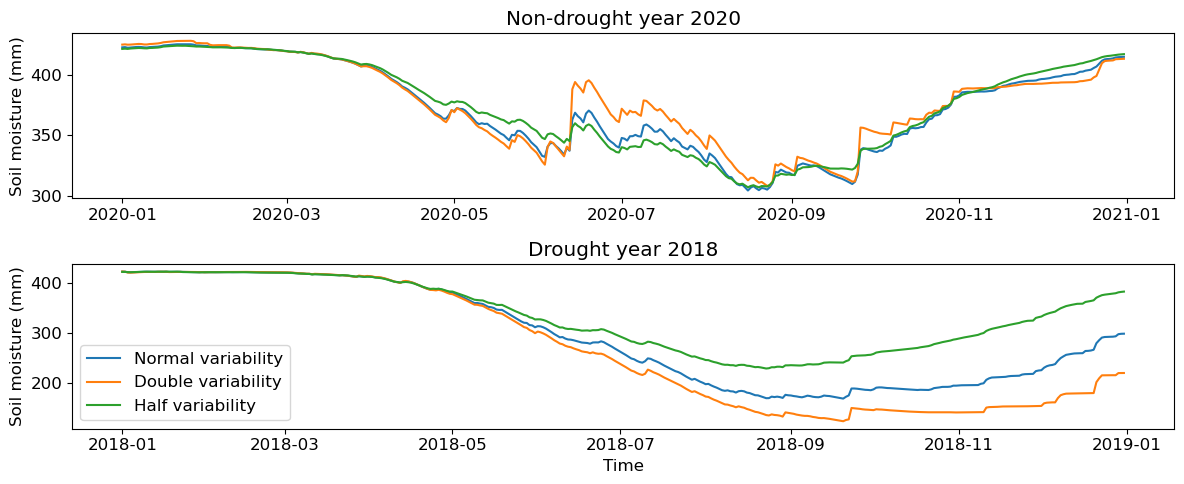

In [34]:
# Plot the time series of Soil Moisture for one year for one gridcell
out_param = 'soil_moisture'
lon = 10.75
lat = 52.75

# Daten für 2020 laden
year_2020 = 2020
sm_data_year_normal_2020 = out_normal[out_param].sel(time=str(year_2020), lon=lon, lat=lat)
sm_data_year_dbl_2020 = out_dbl[out_param].sel(time=str(year_2020), lon=lon, lat=lat)
sm_data_year_half_2020 = out_half[out_param].sel(time=str(year_2020), lon=lon, lat=lat)

# Daten für 2018 laden
year_2018 = 2018
sm_data_year_normal_2018 = out_normal[out_param].sel(time=str(year_2018), lon=lon, lat=lat)
sm_data_year_dbl_2018 = out_dbl[out_param].sel(time=str(year_2018), lon=lon, lat=lat)
sm_data_year_half_2018 = out_half[out_param].sel(time=str(year_2018), lon=lon, lat=lat)

# Plot erstellen
fig, axs = plt.subplots(2, 1, figsize=(12, 5))
plt.rcParams.update({'font.size': 12})  # Update font size

# Plot für 2020
axs[0].plot(sm_data_year_normal_2020['time'], sm_data_year_normal_2020[out_param], label='Normal variability')
axs[0].plot(sm_data_year_dbl_2020['time'], sm_data_year_dbl_2020[out_param], label='Double variability')
axs[0].plot(sm_data_year_half_2020['time'], sm_data_year_half_2020[out_param], label='Half variability')
axs[0].set_ylabel('Soil moisture (mm)')
axs[0].set_title(f'Non-drought year 2020')

# Plot für 2018
axs[1].plot(sm_data_year_normal_2018['time'], sm_data_year_normal_2018[out_param], label='Normal variability')
axs[1].plot(sm_data_year_dbl_2018['time'], sm_data_year_dbl_2018[out_param], label='Double variability')
axs[1].plot(sm_data_year_half_2018['time'], sm_data_year_half_2018[out_param], label='Half variability')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Soil moisture (mm)')
axs[1].set_title(f'Drought year 2018')
axs[1].legend()

plt.tight_layout()
plt.savefig('figs/drought_year_time_series.svg', format='svg', transparent=True)
plt.show()